In [3]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset

data=pd.read_csv("Wine_quality_prediction.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape


(1599, 12)

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

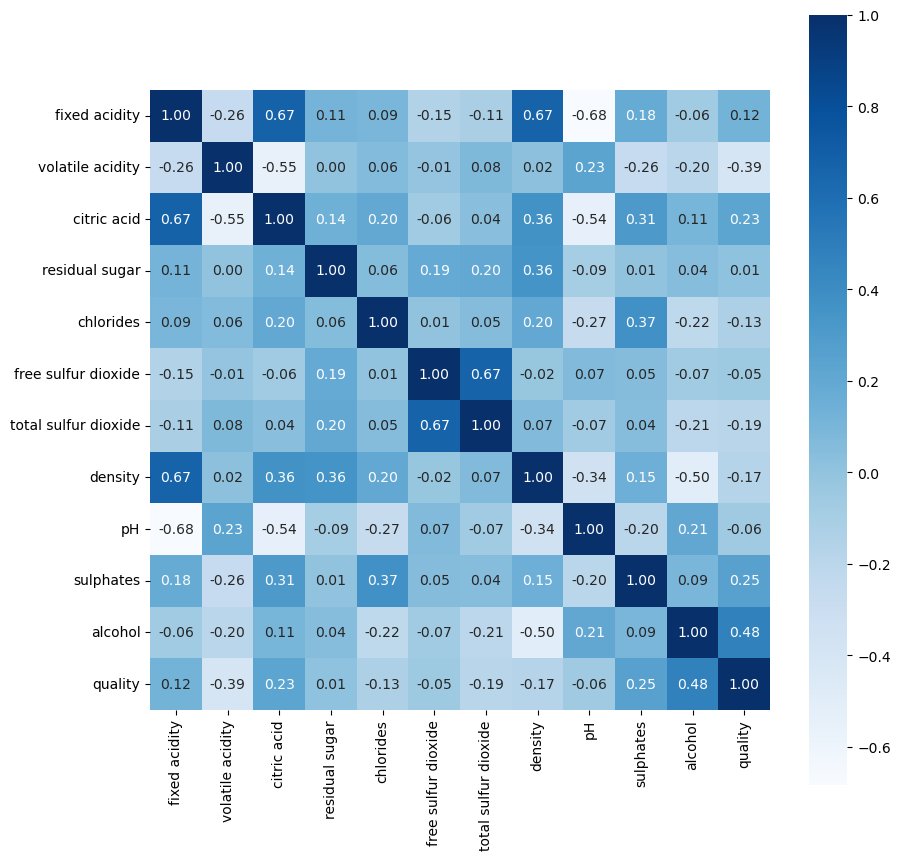

In [8]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Blues')

In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
X=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=data['quality']

In [11]:
# Spliting the dataset 

from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.80, random_state=69)

In [13]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
655,9.7,0.55,0.17,2.9,0.087,20.0,53.0,1.00040,3.14,0.61,9.4
116,8.3,0.54,0.28,1.9,0.077,11.0,40.0,0.99780,3.39,0.61,10.0
1465,6.8,0.59,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7
1170,9.2,0.36,0.34,1.6,0.062,5.0,12.0,0.99667,3.20,0.67,10.5
664,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2
...,...,...,...,...,...,...,...,...,...,...,...
404,7.7,0.69,0.05,2.7,0.075,15.0,27.0,0.99740,3.26,0.61,9.1
439,7.0,0.62,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.3
619,11.3,0.37,0.41,2.3,0.088,6.0,16.0,0.99880,3.09,0.80,9.3
1227,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6


In [14]:
y_train

655     5
116     6
1465    5
1170    6
664     5
       ..
404     5
439     5
619     5
1227    5
1078    5
Name: quality, Length: 1279, dtype: int64

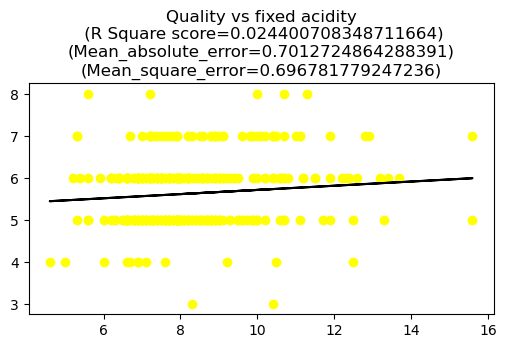

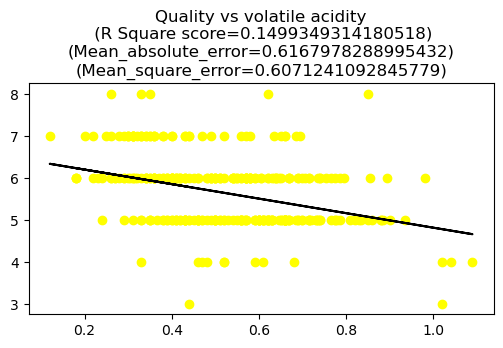

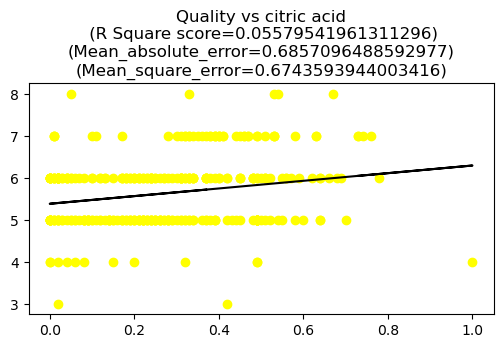

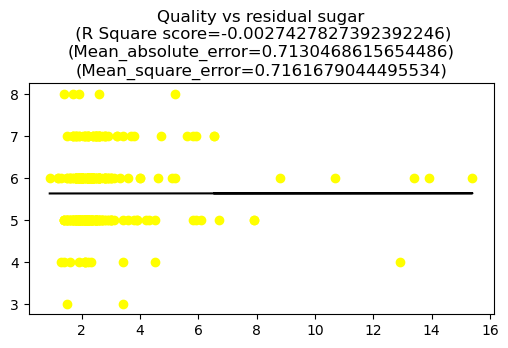

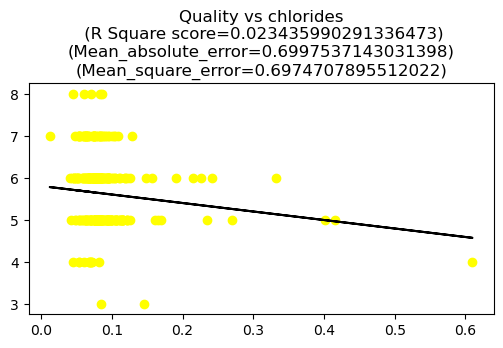

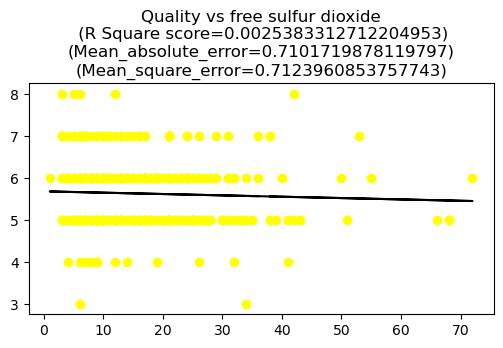

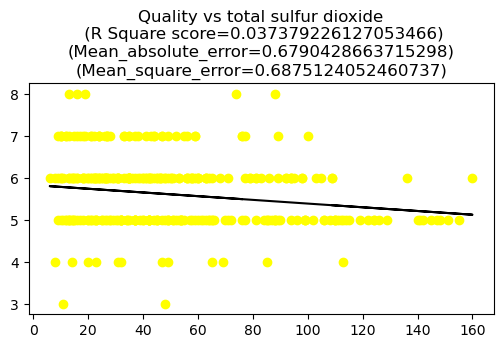

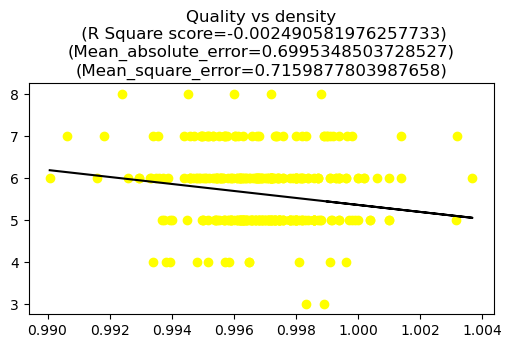

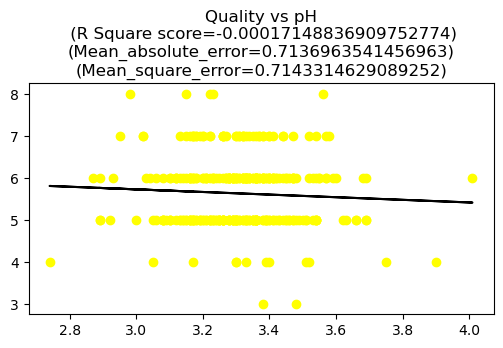

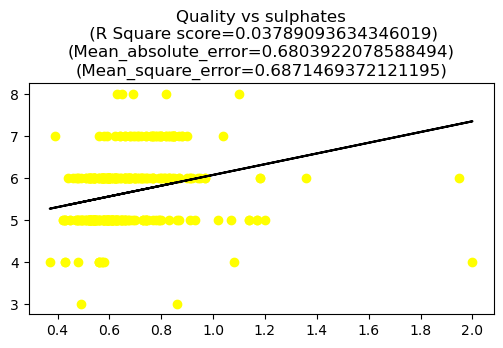

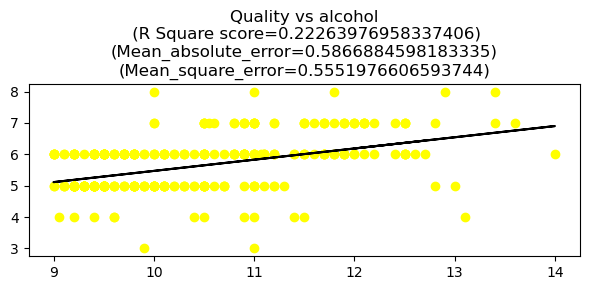

In [15]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
quality=data.loc[:,data.columns=='quality']
for i in range(len(columns)):
    x_linear=data.loc[:,data.columns==columns[i]]
    X_train, X_test, y_train, y_test = train_test_split( x_linear, quality, test_size=0.20, random_state=69)
   

    #linear regression model
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    
    # R_squared 
    r2 = r2_score(y_test,y_predict)
    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test,y_predict)

    # plotting the graphs
    plt.figure(figsize=(6,3))
    #plt.subplot(4,2,i+1)
    plt.title(f'Quality vs {columns[i]}\n (R Square score={r2})\n(Mean_absolute_error={mae})\n(Mean_square_error={mse})')
    plt.scatter(X_test,y_test,color='yellow')
    plt.plot(X_test,y_predict,color='black')
    
plt.tight_layout()
plt.show()

In [24]:
accuracy=model.score(X_test,y_test)
print('Accuracy={}%'.format(int(round(accuracy*100))))

Accuracy=22%
